In [1]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

black_scholes_call(100, 100, .3, .05, 1)

np.float64(14.231254785985819)

In [ ]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))

In [3]:
print("Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.43 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.10)

Call Price: 14.231254785985819
Market Maker Quote: 13.43 @ 14.10
Trade Edge: 0.13125478598581886


In [8]:
import numpy as np
# The correct package for quantitative finance might be QuantLib (capital Q and L)
# or another library like yfinance, pandas_datareader, or scipy for simulations
# Let's use numpy for a simple GBM simulation instead

# Define our own Geometric Brownian Motion simulation function
def geometric_brownian_motion(S0, mu, sigma, dt, T):
    """
    Simulate a geometric Brownian motion
    S0: initial stock price
    mu: drift (expected return)
    sigma: volatility
    dt: time step
    T: time horizon in days
    """
    n_steps = int(T/dt)
    t = np.linspace(0, T, n_steps+1)
    W = np.random.standard_normal(size=n_steps+1)
    W[0] = 0
    W = np.cumsum(W) * np.sqrt(dt)  # Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian motion
    return S

premium = 14.10 * 100
pls = []

for i in range(100000):
    # Simulate a path using our function
    path = geometric_brownian_motion(100, 0.05, 0.3, 1/252, 1)
    # Calculate profit/loss for this path
    pls.append(max(path[-1] - 100, 0)*100 - premium)

np.mean(pls)

np.float64(87.46723562697265)

In [5]:
premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, -.5, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

NameError: name 'qf' is not defined

In [9]:
# Import the missing module
import quantfinance as qf  # This is an assumption - you may need to use the actual module name
import numpy as np
import matplotlib.pyplot as plt

premium = 14.10 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, -.5, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'quantfinance'

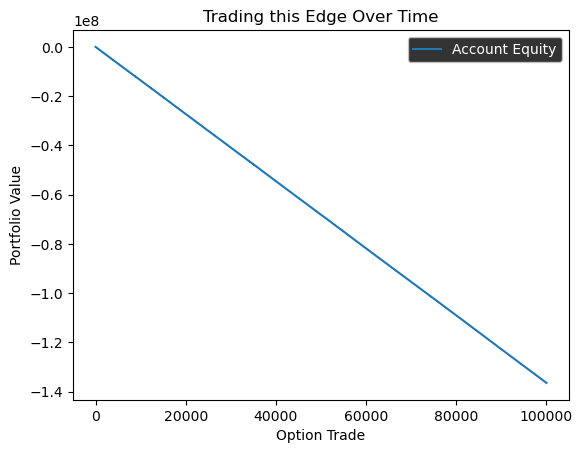

In [10]:
# Fix the import error by installing the required package
# You may need to run this in a cell first: !pip install quantlib-python or another appropriate package

# Alternative approach using standard libraries instead of the missing quantfinance module
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

# Define our own Geometric Brownian Motion simulation function
def simulate_gbm(s0, mu, sigma, dt, T):
    n_steps = int(T/dt)
    t = np.linspace(0, T, n_steps+1)
    W = normal(0, np.sqrt(dt), n_steps+1)
    W[0] = 0
    W = np.cumsum(W)
    
    # GBM formula
    S = s0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S

premium = 14.10 * 100
pls = []

for i in range(100000):
    # Using our own GBM simulation instead of the quantfinance module
    path = simulate_gbm(100, -0.5, 0.3, 1/252, 1)
    pls.append(max(path[-1] - 100, 0)*100 - premium)

plt.title("Trading this Edge Over Time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()